In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('training_dataset.csv')

# Drop the first column (row numbers)
df = df.iloc[:, 1:]  # keeps all columns except the first

df.head()

,Ash,FC,VC,C,H,N,O,T (?C),Yield
0,9.024,13.850,77.125,52.05,5.37,0.49,42.10,500,47.73
1,3.115,11.600,85.285,43.06,5.98,0.55,50.42,500,45.75
2,6.346,8.315,85.334,45.03,6.15,0.94,47.89,500,43.87
3,5.270,4.970,82.600,42.72,5.61,0.44,51.24,500,40.87
4,0.240,3.220,82.700,42.76,5.99,0.39,50.88,500,43.50


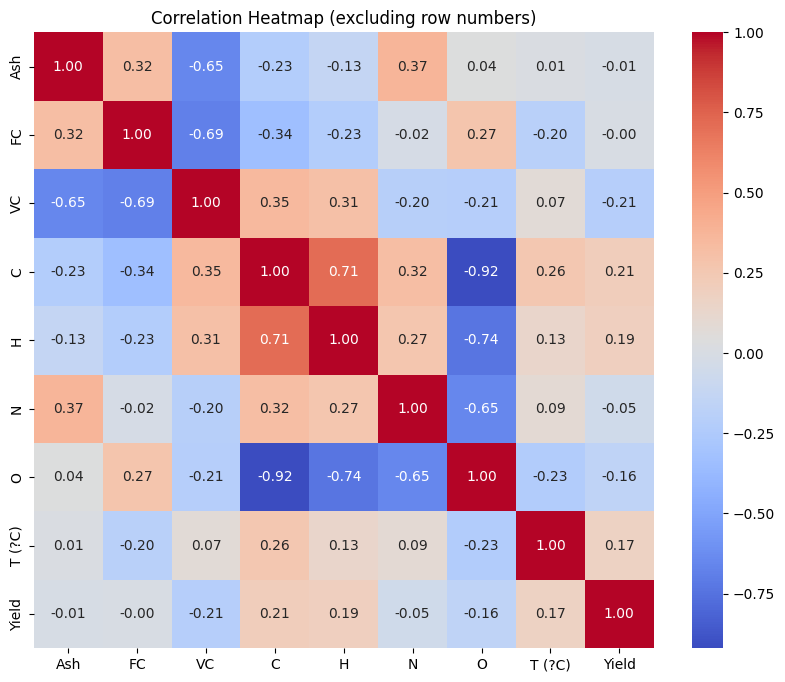

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (excluding row numbers)')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# ---------------------------
# 1. Load your dataset
# ---------------------------
df = pd.read_csv("training_dataset.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train/test split fixed sizes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=183, test_size=62, random_state=42
)

# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------------
# 2. Semi-autotuning loop
# ---------------------------
hidden_layers = [1]  # start with 1 hidden layer, 1 node
best_model = None

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=20, restore_best_weights= False
)

while True:
    if len(hidden_layers) == 4:
        break
    print(f"Trying architecture: {hidden_layers}")

    # Build model
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    for layer_nodes in hidden_layers:
        # Dense with L2 regularization
        model.add(layers.Dense(
            layer_nodes,
            activation="tanh",
            kernel_regularizer=regularizers.l2(0.001)
        ))
        # Dropout layer (e.g. 20% drop)
        model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation="linear"))  # output layer

    model.compile(optimizer="adam", loss="mse")

    # Train
    model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=200, batch_size=16, verbose=0,
        callbacks=[early_stopping]
    )

    # Evaluate R²
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"R² train: {r2_train:.3f}, R² test: {r2_test:.3f}")

    if hidden_layers[-1] == 200:
        print("Adding new hidden layer...")
        hidden_layers.append(1)  # new hidden layer with 1 node

    # Check conditions
    if r2_train > 0.91:
        if r2_test > 0.8:
            print("Criteria satisfied ✅")
            best_model = model
            break
        else:
            if hidden_layers[-1] < 130:
                print("Adding node to last hidden layer...")
                hidden_layers[-1] += 1
            else:
                print("Adding new hidden layer...")
                hidden_layers.append(1)
    else:
        print("Adding node to last hidden layer...")
        hidden_layers[-1] += 1


Trying architecture: [1]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R² train: -9.663, R² test: -11.347
Adding node to last hidden layer...
Trying architecture: [2]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R² train: -6.987, R² test: -8.082
Adding node to last hidden layer...
Trying architecture: [3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R² train: -5.352, R² test: -6.096
Adding node to last hidden layer...
Trying architecture: [4]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
R² train: -4.294, R² test: -4.818
Adding node to last hidden layer...
Trying architecture: [5]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R² train: -3.012, R² test: -3.297
Adding node to last hidden layer...
Trying architecture: [6]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R² train: -2.483, R² test: -2.673
Adding no

Model after semi-autotuning


🔹 Fold 1 ------------------------
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Fold 1 R²: 0.730


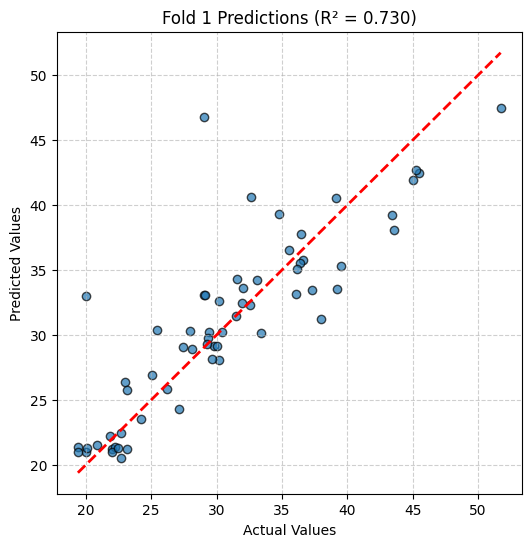


🔹 Fold 2 ------------------------


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Fold 2 R²: 0.870


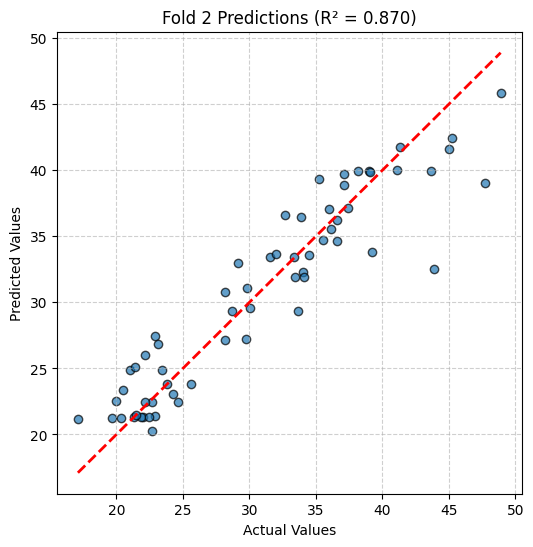


🔹 Fold 3 ------------------------
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Fold 3 R²: 0.817


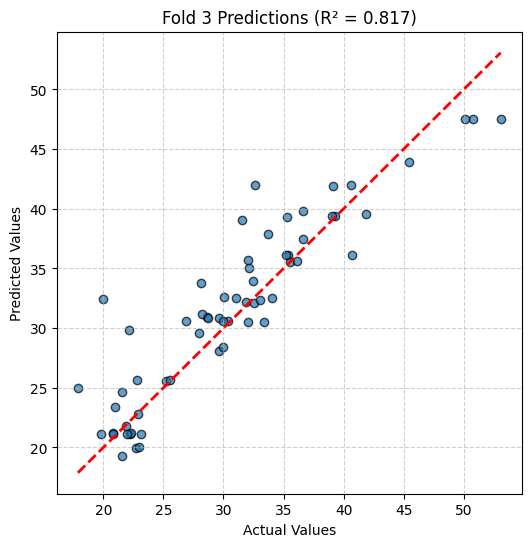


🔹 Fold 4 ------------------------
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Fold 4 R²: 0.794


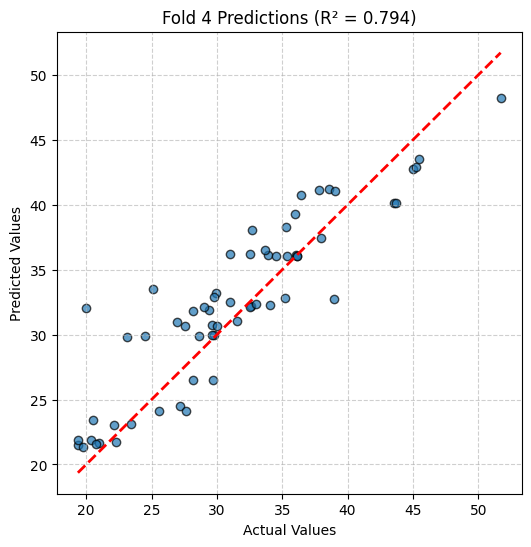


🔹 Fold 5 ------------------------
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Fold 5 R²: 0.727


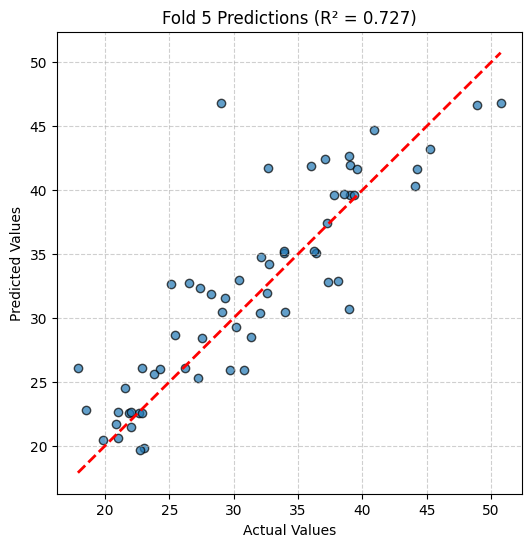


✅ ShuffleSplit CV results:
R² scores per fold: [0.73  0.87  0.817 0.794 0.727]
Mean R²: 0.788 ± 0.054


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt

# ---------------------------
# 1. Load your dataset
# ---------------------------
df = pd.read_csv("training_dataset.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

cv = ShuffleSplit(n_splits=5, train_size=183, test_size=62, random_state=42)
r2_scores = []
fold_no = 1

for train_idx, test_idx in cv.split(X):
    print(f"\n🔹 Fold {fold_no} ------------------------")

    # Train/test split for this fold
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Normalize input features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # ---------------------------
    # 2. Semi-autotuning loop
    # ---------------------------
    hidden_layers = [200,130,130]  # start with 1 hidden layer, 1 node

    # Early stopping callback
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=20, restore_best_weights= False
    )
    # Build model
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    for layer_nodes in hidden_layers:
            # Dense with L2 regularization
        model.add(layers.Dense(
                layer_nodes,
                activation="tanh",
                kernel_regularizer=regularizers.l2(0.001)
            ))
            # Dropout layer (e.g. 20% drop)
        model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation="linear"))  # output layer

    model.compile(optimizer="adam", loss="mse")

    # Train
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=200, batch_size=16, verbose=0,
        callbacks=[early_stopping]
    )

    # Predict
    y_test_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_test_pred)
    r2_scores.append(r2)

    print(f"Fold {fold_no} R²: {r2:.3f}")

    # Optional: Plot predictions vs actual for each fold
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors="k")
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             "r--", lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Fold {fold_no} Predictions (R² = {r2:.3f})")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    fold_no += 1
print("\n✅ ShuffleSplit CV results:")
print(f"R² scores per fold: {np.round(r2_scores,3)}")
print(f"Mean R²: {np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}")

Better Code

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np

# --- 1. Load and prepare your data from a DataFrame ---
# This is a placeholder DataFrame. Replace this section with your actual data loading.
# Assume your DataFrame `df` has 9 columns: 8 input and 1 output.
data = np.random.rand(245, 9)
columns = [f'feature_{i}' for i in range(8)] + ['target']
df = pd.DataFrame(data, columns=columns)

# Define your input (ip) and output (op) columns here
# Replace the list of column names with your actual input column names.
ip_columns = [f'feature_{i}' for i in range(8)]  # Change this to your 8 input columns
op_column = 'target'                          # Change this to your single output column

# Fetch the input and output data from the DataFrame
X = df[ip_columns].values
y = df[op_column].values.reshape(-1, 1) # Reshape for Keras compatibility

# --- 2. Define your desired R^2 criteria ---
R2_TRAIN_CRITERION = 0.95
R2_TEST_CRITERION = 0.85 # This will now be compared against the average test score

def build_and_train_model(num_hidden_layers, nodes_per_layer, X_train, y_train):
    """
    Builds and trains a neural network with the specified architecture.
    """
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_train.shape[1],)))

    # Add hidden layers
    for i in range(num_hidden_layers):
        model.add(keras.layers.Dense(nodes_per_layer[i], activation='tanh'))

    # Add output layer (no activation for regression)
    model.add(keras.layers.Dense(1))

    # Compile and train the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    return model

# --- 3. Semi-autotuning loop with K-Fold Cross-Validation ---
nodes_in_first_layer = 1
num_hidden_layers = 1
nodes_per_layer = [1]
tuning_complete = False
model = None # Initialize model outside the loop
n_splits = 5 # Define the number of folds for cross-validation

print(f"Starting semi-autotuning with {n_splits}-fold cross-validation...")

while not tuning_complete:
    print(f"\n--- Current architecture: {num_hidden_layers} hidden layer(s) ---")

    # Increase nodes in the current last hidden layer
    if num_hidden_layers == len(nodes_per_layer):
        while True:
            print(f"  - Testing with {nodes_in_first_layer} nodes in the current layer...")
            nodes_per_layer[num_hidden_layers - 1] = nodes_in_first_layer

            # Prepare lists to store scores for each fold
            fold_r2_train = []
            fold_r2_test = []

            # Initialize K-fold cross-validation
            kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

            # Iterate through each fold
            for train_index, test_index in kfold.split(X, y):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]

                # Scale the data for the current fold
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                # Build and train the model for the current fold
                model = build_and_train_model(num_hidden_layers, nodes_per_layer, X_train_scaled, y_train)

                # Evaluate the model
                y_train_pred = model.predict(X_train_scaled)
                y_test_pred = model.predict(X_test_scaled)

                fold_r2_train.append(r2_score(y_train, y_train_pred))
                fold_r2_test.append(r2_score(y_test, y_test_pred))

            # Calculate average scores across all folds
            avg_r2_train = np.mean(fold_r2_train)
            avg_r2_test = np.mean(fold_r2_test)
            std_r2_test = np.std(fold_r2_test)

            print(f"    - Average R^2 (Training): {avg_r2_train:.4f}")
            print(f"    - Average R^2 (Test):     {avg_r2_test:.4f} (Standard Deviation: {std_r2_test:.4f})")

            if avg_r2_train >= R2_TRAIN_CRITERION:
                if avg_r2_test >= R2_TEST_CRITERION:
                    print("\n🎉 Tuning complete! Both criteria met.")
                    tuning_complete = True
                    break
                else:
                    print("\n⚠️ Training criterion met, but average test criterion not met. Adding another hidden layer.")
                    break

            nodes_in_first_layer += 1
            if nodes_in_first_layer > 50:  # Safety break to prevent infinite loops
                print("🛑 Reached max nodes limit. Tuning failed for this architecture.")
                tuning_complete = True
                break

    # Add a new hidden layer if the previous condition was not met
    if not tuning_complete:
        num_hidden_layers += 1
        nodes_per_layer.append(1)  # Add a new layer with 1 node
        nodes_in_first_layer = 1 # Reset the node counter for the new layer

if model:
    print("\nFinal Model Summary:")
    model.summary()

